Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [15]:
import pandas as pd

# Opening both CSV's file as a DataFrame
df1 = pd.read_csv('FourSquarePOI.csv')
df2 = pd.read_csv('YelpPOI.csv')

# Joining the data (vertically)
joined_df = pd.concat([df1, df2])

joined_df


,station,usage,total_bikes,poi_name,poi_distance,poi_address
0,Benjamin Godard - Victor Hugo,0.942857,35,Square Lamartine,94.000000,"3 Square Lamartine, 75016 Paris"
1,Benjamin Godard - Victor Hugo,0.942857,35,Axxia,185.000000,"116 rue de la Faisanderie, 75116 Paris"
2,Benjamin Godard - Victor Hugo,0.942857,35,Bs Design,548.000000,"16 rue Spontini, 75116 Paris"
3,Benjamin Godard - Victor Hugo,0.942857,35,Efront,586.000000,"2/4 rue Louis David, 75016 Paris"
4,Benjamin Godard - Victor Hugo,0.942857,35,Clinique de la Muette (Clinique de la Muette -...,640.000000,"46-48 rue Nicolo, 75116 Paris"
...,...,...,...,...,...,...
9745,Stade Auguste Delaune,0.500000,20,Chez Giovanni,804.690916,4 avenue du Général Leclerc
9746,Stade Auguste Delaune,0.500000,20,Sushi Clemenceau,686.389474,71 Avenue Georges Clemenceau
9747,Stade Auguste Delaune,0.500000,20,Musée Fragonard,1091.670590,7 Avenue du Gal de Gaulle
9748,Stade Auguste Delaune,0.500000,20,Le 58,580.965587,58 avenue Gambetta


In [16]:
# I'm saving the dataframe to CSV for the next section
joined_df.to_csv('joined.csv', index=False)


### Checking Data Types

In [17]:
joined_df.dtypes


station          object
usage           float64
total_bikes       int64
poi_name         object
poi_distance    float64
poi_address      object
dtype: object

### Checking for null values

In [18]:
print(joined_df.isnull().sum())


station           0
usage             0
total_bikes       0
poi_name          0
poi_distance      0
poi_address     154
dtype: int64


### Outlier detection

In [19]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


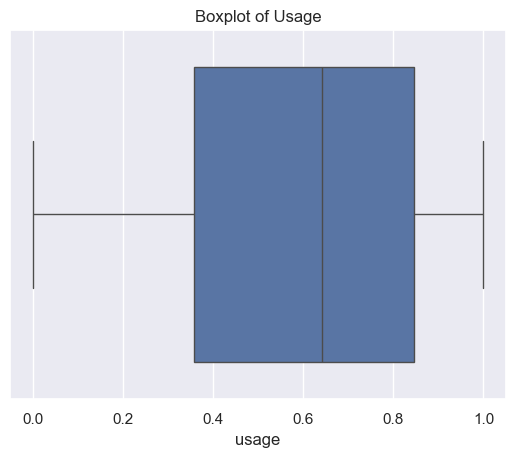

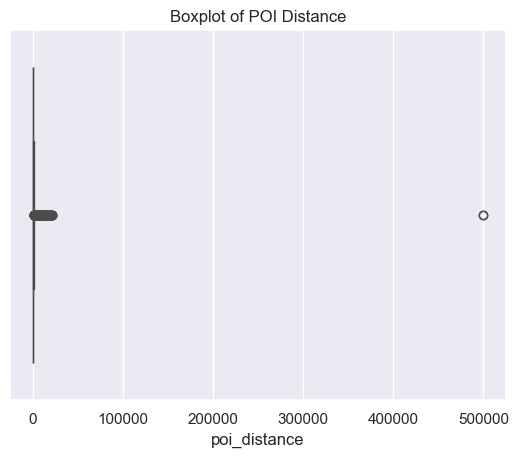

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'usage'
sns.boxplot(x=joined_df['usage'])
plt.title('Boxplot of Usage')
plt.show()

# Boxplot for 'poi_distance'
sns.boxplot(x=joined_df['poi_distance'])
plt.title('Boxplot of POI Distance')
plt.show()


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

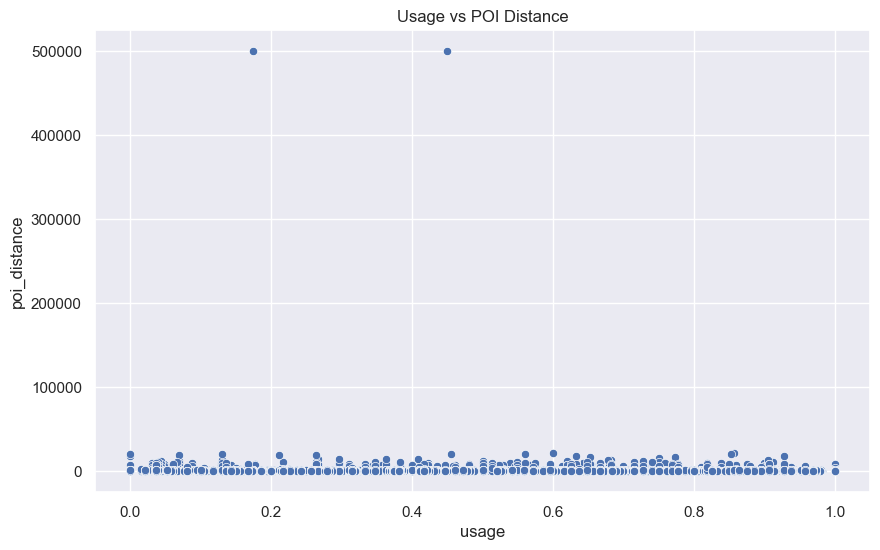

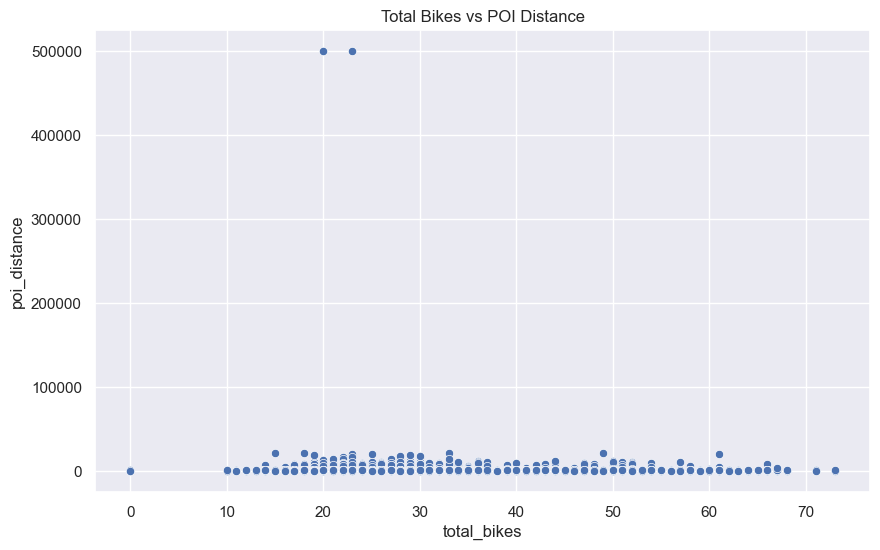

In [30]:
# Scatterplot for Usage vs POI Distance
plt.figure(figsize=(10,6))
sns.scatterplot(data=joined_df, x='usage', y='poi_distance')
plt.title('Usage vs POI Distance')
plt.show()

# Scatterplot for Total Bikes vs POI Distance
plt.figure(figsize=(10,6))
sns.scatterplot(data=joined_df, x='total_bikes', y='poi_distance')
plt.title('Total Bikes vs POI Distance')
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [34]:
import sqlite3

# Database connection
conn = sqlite3.connect('points_of_interest.db')
joined_df.to_sql('poi', conn, index=False, if_exists='replace')

# Validate data insertion
cursor = conn.cursor()
cursor.execute("SELECT * FROM poi")
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()


('Benjamin Godard - Victor Hugo', 0.9428571428571428, 35, 'Square Lamartine', 94.0, '3 Square Lamartine, 75016 Paris')
('Benjamin Godard - Victor Hugo', 0.9428571428571428, 35, 'Axxia', 185.0, '116 rue de la Faisanderie, 75116 Paris')
('Benjamin Godard - Victor Hugo', 0.9428571428571428, 35, 'Bs Design', 548.0, '16 rue Spontini, 75116 Paris')
('Benjamin Godard - Victor Hugo', 0.9428571428571428, 35, 'Efront', 586.0, '2/4 rue Louis David, 75016 Paris')
('Benjamin Godard - Victor Hugo', 0.9428571428571428, 35, 'Clinique de la Muette (Clinique de la Muette - Ramsay Santé)', 640.0, '46-48 rue Nicolo, 75116 Paris')
('Benjamin Godard - Victor Hugo', 0.9428571428571428, 35, 'Golden Spoon', 716.0, '129 rue Lauriston, 75016 Paris 16eme Arrondissement')
('Benjamin Godard - Victor Hugo', 0.9428571428571428, 35, 'Pavillon Passy Events Location de Salle', 727.0, '6 rue Faustin Hélie, 75116 Paris')
('Benjamin Godard - Victor Hugo', 0.9428571428571428, 35, 'LOWELL Detective Prive Paris', 737.0, '15 r

Look at the data before and after the join to validate your data.

In [32]:
import pandas as pd

# Load DataFrames
df1 = pd.read_csv('FourSquarePOI.csv')
df2 = pd.read_csv('YelpPOI.csv')

# Validate columns of both DataFrames
print("Columns in Foursquare DataFrame:", df1.columns)
print("Columns in Yelp DataFrame:", df2.columns)

# Joining the data (vertically)
joined_df = pd.concat([df1, df2], ignore_index=True)

# Checking Data Types
print("\nData Types:\n", joined_df.dtypes)

# Checking for Null Values
print("\nNull Values:\n", joined_df.isnull().sum())


Columns in Foursquare DataFrame: Index(['station', 'usage', 'total_bikes', 'poi_name', 'poi_distance',
       'poi_address'],
      dtype='object')
Columns in Yelp DataFrame: Index(['station', 'usage', 'total_bikes', 'poi_name', 'poi_distance',
       'poi_address'],
      dtype='object')

Data Types:
 station          object
usage           float64
total_bikes       int64
poi_name         object
poi_distance    float64
poi_address      object
dtype: object

Null Values:
 station           0
usage             0
total_bikes       0
poi_name          0
poi_distance      0
poi_address     154
dtype: int64
